<h3>In this notebook i am trying to show how can we improve performence of a ML modal by following few preprocessing steps and doing some hyperparameter tuning. The task is to indentify the sales price of a house, prvided attributes of it</h3>

<h3>This is a regression prblem for which you can download the data from below link</h3>
https://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel(r"C:\Users\dtripathi\DS\Assignment\AmesHousing.xls", keep_default_na=False, na_values="")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [3]:
print("(rows, columns)=",df.shape)

(rows, columns)= (2930, 82)


In [72]:
#check If there is any null value in our dataset
df.isnull().any().sum()

0

In [5]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


([<matplotlib.axis.XTick at 0x1b7e5cc0>,
 <a list of 10 Text xticklabel objects>)

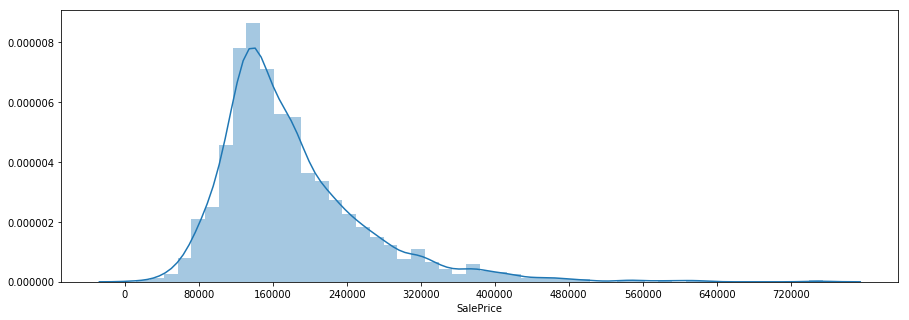

In [77]:
#Lets plot the distribution of sales price
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['SalePrice'])
x=np.linspace(0,800000,10,endpoint=False)
plt.xticks(x)

In [6]:
#removing first two columns
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
categorical = df.dtypes == object

#sagregate numerical and categorical columns
cat = categorical.index[categorical]   #contains categorical columns
num = categorical.index[~categorical]    #contains numerical columns
df[cat] = df[cat].fillna(value="Missing")
df[num] = df[num].fillna(value=0)
X = df.drop(['SalePrice'], axis = 1)
target = df['SalePrice']

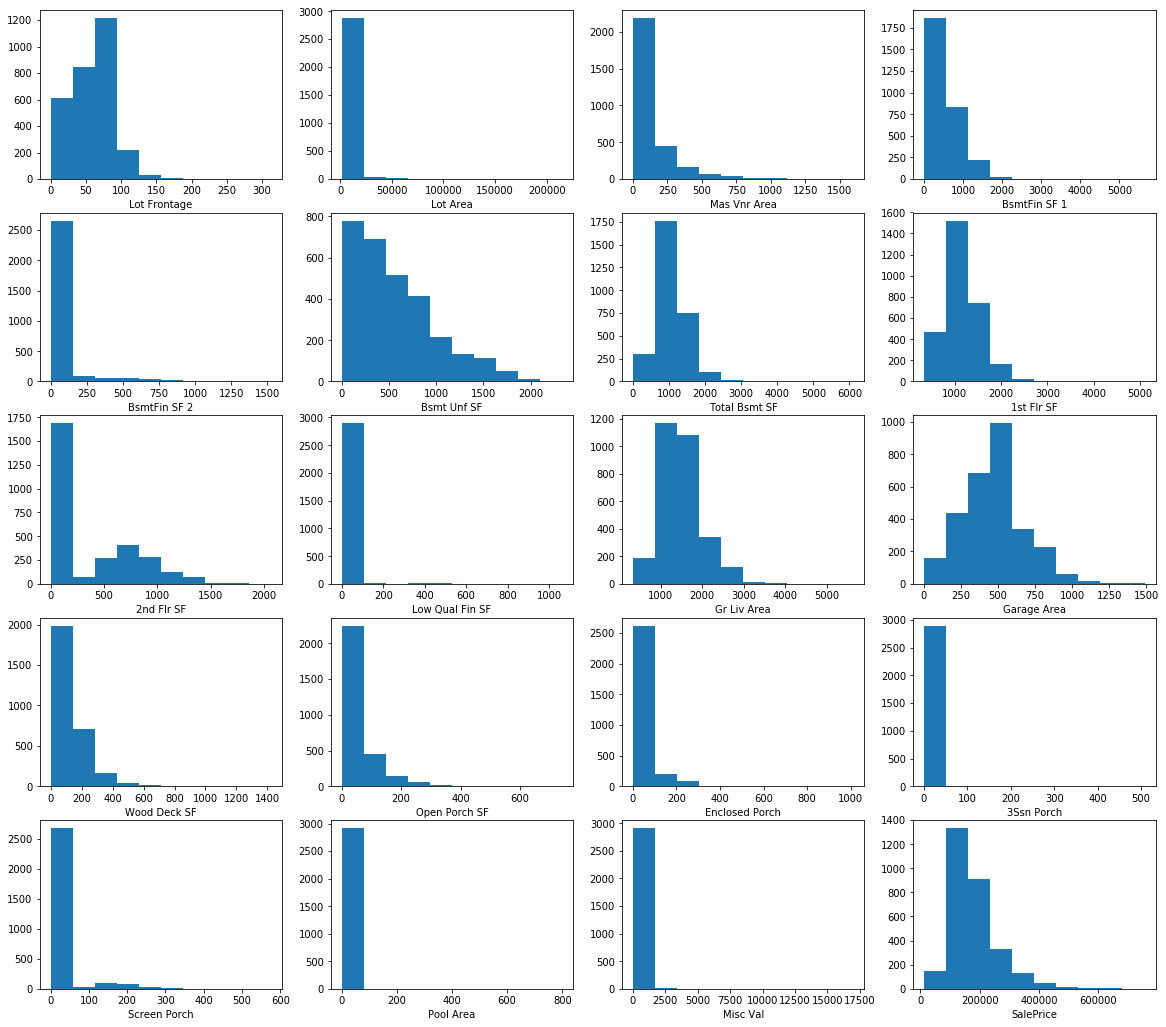

In [7]:
continuous_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
'2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']

fig, axes = plt.subplots(5, 4, figsize=(20,18))
#creating the plots
for i in range(5):
    for j in range(4):
        col_name = continuous_cols[i*4 + j]
        axes[i,j].hist(df[col_name])
        axes[i,j].set_xlabel(col_name)
plt.show()

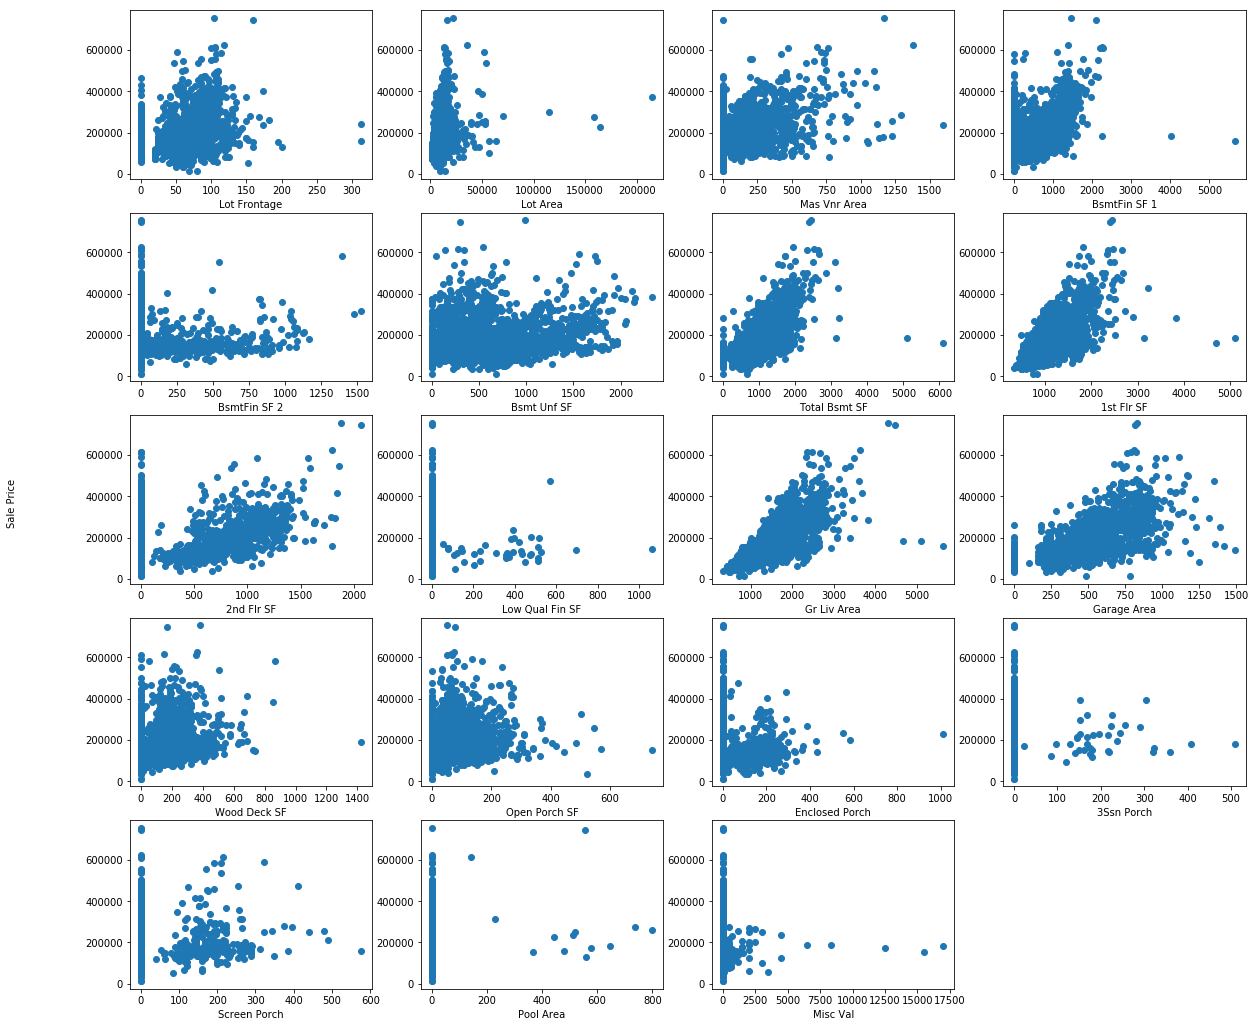

In [8]:
fig, axes = plt.subplots(5, 4, figsize=(20,18))
#creating the plots
for i in range(5):
    for j in range(4):
        col_name = continuous_cols[i*4 + j]
        axes[i,j].scatter(df[col_name], df['SalePrice'])
        axes[i,j].set_xlabel(col_name)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation='vertical')
fig.delaxes(axes[4,3])
plt.show()

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

categorical = X.dtypes == object
cat = categorical.index[categorical]
numeric = categorical.index[~categorical]

X_train, X_test, y_train, y_test = train_test_split(X, target)
cross_val_scores = []
for category in cat:
    df_one = X_train[category]
    x = pd.get_dummies(df_one)
    scores = cross_val_score(LinearRegression(), x, y_train, cv=5)
    cross_val_scores.append((np.mean(scores), category)) #(score, category)

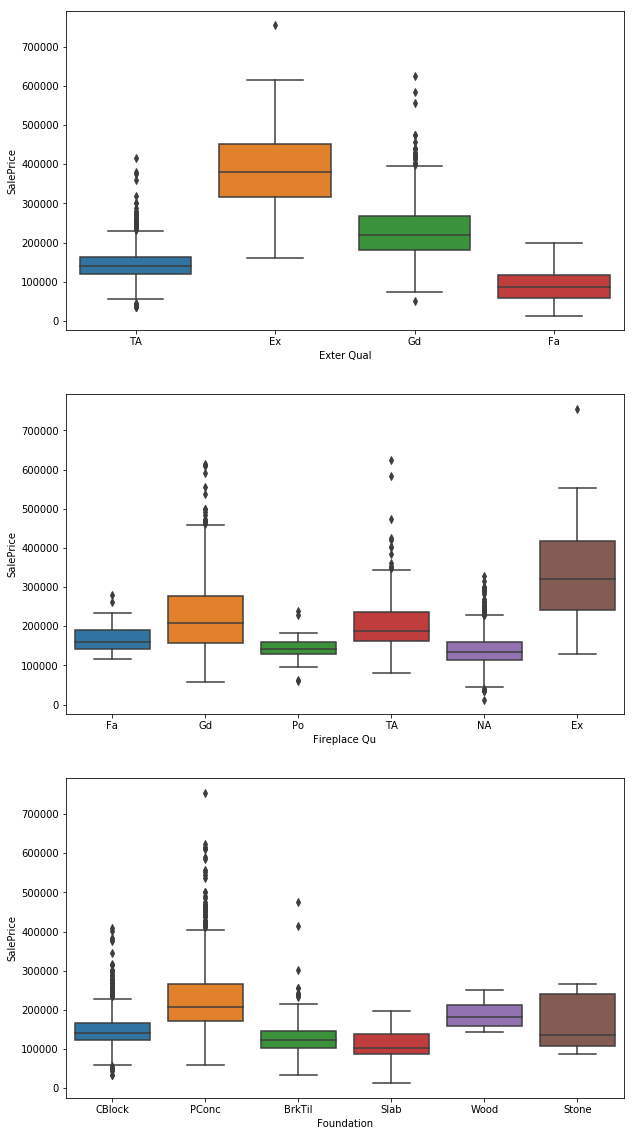

In [10]:
#using each categorical column alone to train the modal and then selecting top 3 categories that give the best accuracy 
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
i = 0
for k in sorted(cross_val_scores, key=lambda x:x[0], reverse=True)[:3]:
    #axes[i].scatter(X_train[k[1]], y_train)
    sns.boxplot(X_train[k[1]], y_train, ax=axes[i])
    #sns.violinplot(X_train[k[1]], y_train, ax=axes[i])
    axes[i].set_xlabel(k[1])
    i += 1
#fig.text(0.04, 0.5, 'Sale Price', va='center', rotation='vertical')

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import Ridge, Lasso, ElasticNet
warnings.filterwarnings('ignore')

In [15]:
#without scaling
print("************** Without Scaling **************")
preprocess = ColumnTransformer([
                                ("imp", SimpleImputer(missing_values=0, strategy='mean'), ~categorical),
                                ("ohe", OneHotEncoder(handle_unknown='ignore'), categorical)])

model1 = make_pipeline(preprocess, LinearRegression())
score = cross_val_score(model1, X_train, y_train, cv=5)
print("LinearRegression = ", np.mean(score))

model2 = make_pipeline(preprocess, Ridge())
score = cross_val_score(model2, X_train, y_train, cv=5)
print("Ridge = ", np.mean(score))

model3 = make_pipeline(preprocess, Lasso())
score = cross_val_score(model3, X_train, y_train, cv=5)
print("Lasso = ", np.mean(score))

model4 = make_pipeline(preprocess, ElasticNet())
score = cross_val_score(model4, X_train, y_train, cv=5)
print("ElasticNet = ", np.mean(score))

************** Without Scaling **************
LinearRegression =  0.8241232372250457
Ridge =  0.6010433348491565
Lasso =  0.8221046809123971
ElasticNet =  0.8088643859068976


In [17]:
#with scaling
print("************** With Scaling **************")
preprocess1 = ColumnTransformer([
                                ("pip", make_pipeline(SimpleImputer(missing_values=0, strategy='mean'),
                                StandardScaler()), ~categorical),
                                ("ohe", OneHotEncoder(handle_unknown='ignore'), categorical)])

model1 = make_pipeline(preprocess1, LinearRegression())
score = cross_val_score(model1, X_train, y_train, cv=5)
print("LinearRegression = ", np.mean(score))

model2 = make_pipeline(preprocess1, Ridge())
score = cross_val_score(model2, X_train, y_train, cv=5)
print("Ridge = ", np.mean(score))

model3 = make_pipeline(preprocess1, Lasso())
score = cross_val_score(model3, X_train, y_train, cv=5)
print("Lasso = ", np.mean(score))

model4 = make_pipeline(preprocess1, ElasticNet())
score = cross_val_score(model4, X_train, y_train, cv=5)
print("ElasticNet = ", np.mean(score))

************** With Scaling **************
LinearRegression =  0.8097807591677698
Ridge =  0.8447515073431211
Lasso =  0.8221473514648604
ElasticNet =  0.8194446176693775


In [18]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

model = {}
model['Ridge'] = model2
model['Lasso'] = model3
model['ElasticNet'] = model4

param_grid = {}
param_grid['Ridge'] = {'ridge__alpha': np.logspace(-3, 3, 13)}
param_grid['Lasso'] = {'lasso__alpha': np.logspace(-3, 0, 13)}
param_grid['ElasticNet'] = {'elasticnet__alpha': np.logspace(-4, -1, 10),
                            'elasticnet__l1_ratio': [0.01, .1, .5, .9, .98, 1]}


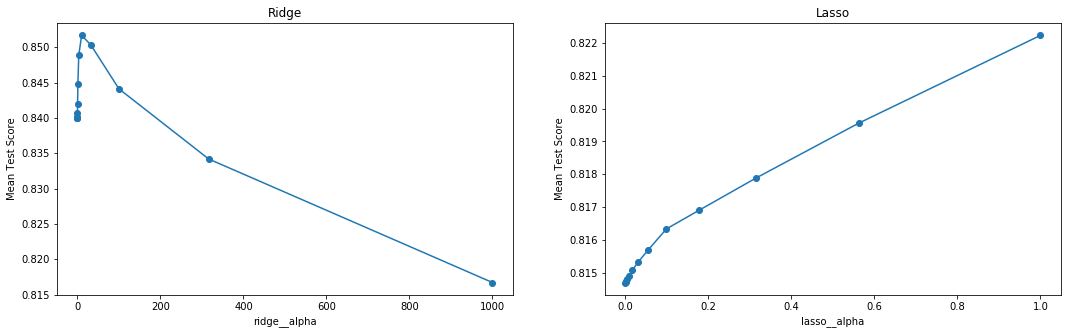

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18,5))
ind = 0
final_grid = {}
for i in model:
    grid = GridSearchCV(model[i], param_grid[i], cv=5)
    grid.fit(X_train, y_train)
    final_grid[i] = grid
    test_mean = grid.cv_results_['mean_test_score']
    if i != "ElasticNet":
        for measure in param_grid[i]:
            axes[ind].plot(param_grid[i][measure], test_mean,marker='o')
            axes[ind].set_title(i)
            axes[ind].set_xlabel(measure)
            axes[ind].set_ylabel("Mean Test Score")
        ind += 1
plt.show()

In [20]:
print('************** After Grid Search **************')
for i in final_grid:
    print(i + " = ", np.max(final_grid[i].cv_results_['mean_test_score']))

************** After Grid Search **************
Ridge =  0.8516667941747355
Lasso =  0.8222252009250418
ElasticNet =  0.8514745775335839


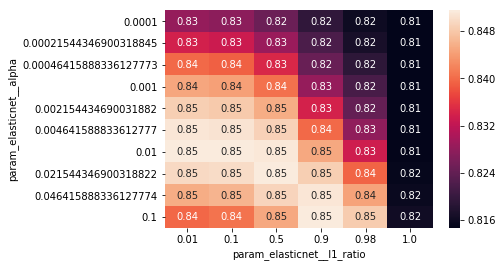

In [21]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_),
                        values='mean_test_score',
                        index='param_elasticnet__alpha',
                        columns='param_elasticnet__l1_ratio')
ax = sns.heatmap(res, annot = True)

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

print("*"*50,"Without Grid Search","*"*50)

model7 = make_pipeline(preprocess1, RandomForestRegressor())
score = cross_val_score(model7, X_train, y_train, cv=5)
print("RandomForestRegressor = ", np.mean(score))

model8 = make_pipeline(preprocess1, GradientBoostingRegressor())
score = cross_val_score(model8, X_train, y_train, cv=5)
print("GradientBoostingRegressor = ", np.mean(score))

model9 = make_pipeline(preprocess1,SVR())
score = cross_val_score(model9, X_train, y_train, cv=5)
print("SVR = ", np.mean(score))

************************************************** Without Grid Search **************************************************
RandomForestRegressor =  0.8835709817384265
GradientBoostingRegressor =  0.9074823518761754
SVR =  -0.0674174996980609


In [55]:
model = {}
#model['SVR'] = model9
model['Random'] = model7
model['XGBoost'] = model8

param_grid = {}
#param_grid['SVR'] = {'svr__kernel': ('linear', 'rbf','poly'),'svr__C':[1.5, 10],'svr__gamma': [1e-7, 1e-4],'svr__epsilon':[0.1,0.2,0.5,0.3]}
param_grid['Random'] = {'randomforestregressor__n_estimators': [10,20,30],
                        'randomforestregressor__max_features':["auto", "sqrt", "log2"],
                        'randomforestregressor__min_samples_split':[2,4,8],
                        'randomforestregressor__bootstrap': [True, False]}

param_grid['XGBoost'] = {'gradientboostingregressor__n_estimators': [10,20,30],
                         'gradientboostingregressor__max_depth': [5, 6, 7]}

In [58]:
final_grid = {}
for i in model:
    grid = GridSearchCV(model[i], param_grid[i], cv=5)
    grid.fit(X_train, y_train)
    final_grid[i] = grid
    test_mean = grid.cv_results_['mean_test_score']

In [60]:
print('************** After Grid Search **************')
for i in final_grid:
    print(i + " = ", np.max(final_grid[i].cv_results_['mean_test_score']))

************** After Grid Search **************
Random =  0.8892294199079496
XGBoost =  0.890128837983839


<h3>GradientBoostingRegressor with default parameters has given the best accuracy which is 0.9074823518761754 </h3>